# 5.8.3 Test ANOVA de una vía (f_classif) para problemas de clasificación

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import f

import warnings
warnings.filterwarnings("ignore")

link: https://www.youtube.com/watch?v=l_orN0tUBe0&list=PLEFpZ3YehTnCx0mS5OhPWb75RIxryBzws&index=3

links: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

## 5.8.3.1 Datos de prueba

In [3]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

#
# Note que x0 y x1 son significativas, mientras que x2 es una variable
# aleatoria no explicativa
#
X = np.hstack((X, 2 * np.random.random((X.shape[0], 1))))
X.shape

(150, 3)

## 5.8.3.2 Metodología

En este caso, se realiza una prueba de hipótesis para cada variable independiente del dataset.

La hipótesis nula es que los grupos (cada clase presente en el dataset) tienen la misma media poblacional para la característica analizada (La variable no es significativa para construir un clasificador).

$$ H_{0}:\mu_{0} = \mu_{1} = ⋯ = \mu_{k} $$

mientras que la hipótesis alternativa es que alguna de las medias es significativamente diferente de las otras (la variable es significativa). Sin embargo, la prueba no indica cual de las medias es diferente.

Para el siguiente ejemplo se realiza una prueba para cada una de las tres columnas del datset.

En la siguiente figura se grafican las tres clases para las variables $x_1$(significativa) y $x_2$ (no significativa), y las respectivas medias para cada clase. Como se puede observar, las medias de los tres grupos son claramente diferentes para $x_1$, y no lo son para $x_2$. En esta metodología, el grado de diferecia se mide a través del valor crítico.

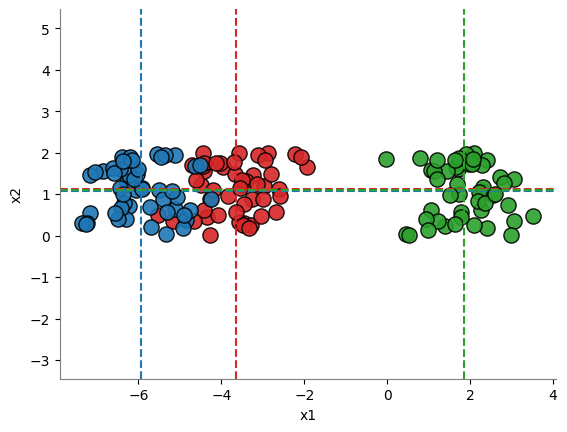

In [6]:
plt.scatter(X[:50, 1], X[:50, 2], color="tab:red", edgecolors="k", s=120, alpha=0.9)
plt.scatter(X[50:100, 1], X[50:100, 2], color="tab:blue", edgecolors="k", s=120, alpha=0.9)
plt.scatter(X[100:, 1], X[100:, 2], color="tab:green", edgecolors="k", s=120, alpha=0.9)

x1_0_mean = X[:50, 1].mean()
x2_0_mean = X[:50, 2].mean()

x1_1_mean = X[50:100, 1].mean()
x2_1_mean = X[50:100, 2].mean()

x1_2_mean = X[100:, 1].mean()
x2_2_mean = X[100:, 2].mean()

plt.xlabel("x1")
plt.ylabel("x2")

plt.axvline(x1_0_mean, color="tab:red", linestyle="--")
plt.axhline(x2_0_mean, color="tab:red", linestyle="--")

plt.axvline(x1_1_mean, color="tab:blue", linestyle="--")
plt.axhline(x2_1_mean, color="tab:blue", linestyle="--")

plt.axvline(x1_2_mean, color="tab:green", linestyle="--")
plt.axhline(x2_2_mean, color="tab:green", linestyle="--")

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

## 5.8.3.3 Supuestos

La variable dependiente es normalmente distribuida en cada grupo (pero aca la variable dependiente es el grupo, alerta!!!).

Las observaciones son independienes.

## 5.8.3.4 Realización de la prueba

In [8]:
def one_way_anova(x0, x1, x2, n_classes):

    n_samples = len(x0) + len(x1) + len(x2)

    n0 = len(x0)
    n1 = len(x1)
    n2 = len(x2)

    # sum(x^2) per group
    sum_of_squares_x0 = sum(np.power(x0, 2))
    sum_of_squares_x1 = sum(np.power(x1, 2))
    sum_of_squares_x2 = sum(np.power(x2, 2))

    # sum(x^2) over all data
    sum_of_squares_all = sum_of_squares_x0 + sum_of_squares_x1 + sum_of_squares_x2

    # sum(x) per group
    sum_x0 = sum(x0)
    sum_x1 = sum(x1)
    sum_x2 = sum(x2)

    # (sum(x)  over all data) ^ 2
    square_of_sum_all = np.power(sum_x0 + sum_x1 + sum_x2, 2)

    square_of_sum_x0 = sum_x0 ** 2
    square_of_sum_x1 = sum_x1 ** 2
    square_of_sum_x2 = sum_x2 ** 2
    sstot = sum_of_squares_all - square_of_sum_all / float(n_samples)

    # Between-group sum of squared differences
    sb = square_of_sum_x0 / n0 + square_of_sum_x1 / n1 + square_of_sum_x2 / n2
    sb = sb - square_of_sum_all / float(n_samples)

    # Between-group degress of freedom
    dfbn = n_classes - 1

    # Between-group mean square value
    msb = sb / dfbn

    # within-group sum of squares
    sw = sstot - sb

    # between
    dfwn = n_samples - n_classes

    # within-group mean square value (MSw)
    msw = sw / float(dfwn)

    f_statistic = msb / msw
    p_value = 1 - f.cdf(f_statistic, dfbn, dfwn)

    print(f_statistic, p_value)


#
# Cómputo de la prueba para cada una de las características del dataset
#
one_way_anova(
    x0=X[y == 0, 0].reshape(-1),
    x1=X[y == 1, 0].reshape(-1),
    x2=X[y == 2, 0].reshape(-1),
    n_classes=3,
)

one_way_anova(
    x0=X[y == 0, 1].reshape(-1),
    x1=X[y == 1, 1].reshape(-1),
    x2=X[y == 2, 1].reshape(-1),
    n_classes=3,
)

one_way_anova(
    x0=X[y == 0, 2].reshape(-1),
    x1=X[y == 1, 2].reshape(-1),
    x2=X[y == 2, 2].reshape(-1),
    n_classes=3,
)

#
# La última característica no es relevante
#

4102.76085554055 1.1102230246251565e-16
1364.5378886742121 1.1102230246251565e-16
0.08960172324361401 0.9143451507629041


In [9]:
#
# --- Verificación ------------------------------------------------------------
#
from sklearn.feature_selection import f_classif

f_statistic, p_values = f_classif(X, y)

print(f_statistic[0], p_values[0])
print(f_statistic[1], p_values[1])
print(f_statistic[2], p_values[2])

4102.76085554055 1.1072088139550013e-129
1364.5378886742121 1.1912427174340918e-95
0.08960172324361401 0.9143451507628992


In [ ]:
print('ok_')